Team Id: PNT2022TMID29438

Project Name: AI-Powered Nutrition Analyzer For Fitness Enthusiasts

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fu_3e3UmnhOva1kg4zTEs8zDhVxZW-BTfvFOPc7raT3r',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aipowerednutritionanalyzer-donotdelete-pr-rp0ttr8a6odesq'
object_key = 'Dataset.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


**Unzipping the DataSet Folder**

In [5]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:
ls -1

Dataset/


In [7]:
pwd

'/home/wsuser/work'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
x_train = train_datagen.flow_from_directory(
    r'/home/wsuser/work/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 4138 images belonging to 5 classes.


In [11]:
x_test = test_datagen.flow_from_directory(
    r'/home/wsuser/work/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 929 images belonging to 3 classes.


In [12]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [13]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [14]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 995, 1: 1374, 2: 1019, 3: 275, 4: 475})

**Importing libraries**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D

**Model Creation**

In [16]:
model = Sequential()

In [17]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

In [18]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

**Model Compiling**

In [20]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [21]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=10, validation_data=x_test,validation_steps = len(x_test))

/tmp/wsuser/ipykernel_283/3242859618.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
828/828 [==============================] - 48s 57ms/step - loss: 0.6009 - accuracy: 0.7740 - val_loss: 0.4821 - val_accuracy: 0.8019
Epoch 2/10
828/828 [==============================] - 47s 57ms/step - loss: 0.4171 - accuracy: 0.8412 - val_loss: 0.4466 - val_accuracy: 0.8439
Epoch 3/10
828/828 [==============================] - 48s 57ms/step - loss: 0.3732 - accuracy: 0.8606 - val_loss: 0.6496 - val_accuracy: 0.7804
Epoch 4/10
828/828 [==============================] - 47s 57ms/step - loss: 0.3496 - accuracy: 0.8610 - val_loss: 0.4814 - val_accuracy: 0.7869
Epoch 5/10
828/828 [==============================] - 46s 56ms/step - loss: 0.3295 - accuracy: 0.8755 - val_loss: 0.3931 - val_accuracy: 0.8536
Epoch 6/10
828/828 [==============================] - 46s 56ms/step - loss: 0.3016 - accuracy: 0.8823 - val_loss: 0.4201 - val_accuracy: 0.8504
Epoch 7/10
828/828 [==============================] - 47s 57ms/step - loss: 0.2969 - accuracy: 0.8838 - val_loss: 0.4318 - val_accuracy:

**Save The Model**

In [22]:
classifier.save('nutrition.h5')

**Test The Model**

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

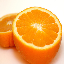

In [24]:
img = image.load_img(r"/home/wsuser/work/Dataset/TRAIN_SET/ORANGE/n07749192_5963.jpg",target_size= (64,64))
img

In [25]:
x=image.img_to_array(img)

In [26]:
x

array([[[251., 239., 225.],
        [254., 240., 227.],
        [254., 242., 228.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 251.]],

       [[252., 240., 226.],
        [252., 240., 226.],
        [255., 243., 229.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 251.]],

       [[254., 242., 228.],
        [254., 242., 228.],
        [253., 243., 231.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 253.]],

       ...,

       [[250., 223., 204.],
        [252., 225., 204.],
        [254., 227., 208.],
        ...,
        [242., 223., 216.],
        [243., 226., 218.],
        [243., 226., 218.]],

       [[249., 227., 206.],
        [250., 225., 205.],
        [251., 229., 208.],
        ...,
        [243., 226., 218.],
        [243., 226., 219.],
        [245., 228., 220.]],

       [[248., 225., 207.],
        [251., 228., 210.],
        [251., 2

In [27]:
x.ndim

3

In [28]:
x=np.expand_dims(x,axis=0)

In [29]:
x.ndim

4

In [30]:
pred = classifier.predict(x)

In [31]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [32]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'ORANGE'

In [33]:
!tar -zcvf nutrition-analyzer-model.tgz nutrition.h5

nutrition.h5


In [34]:
ls -1

Dataset/
nutrition-analyzer-model.tgz
nutrition.h5


**IBM Deployment**

In [35]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 11.3 MB/s eta 0:00:01


In [36]:
!pip install ibm_watson_machine_learning

In [83]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
                 "url":"https://us-south.ml.cloud.ibm.com",
                 "apikey":"BHiApsPakqYBcWpcAdoXYJWxuTQCOVbdc_nUhBY-LZB7"
                }

client =APIClient(wml_credentials)

In [84]:
client = APIClient(wml_credentials)

In [89]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
4a2c0783-50ca-404c-be55-45c4f72fcffd  Nutrition_Analyzer  2022-11-18T02:18:59.200Z
------------------------------------  ------------------  ------------------------


In [90]:
space_id = guid_space_name(client,'Nutrition_Analyzer')
print("Space UID = " + space_id)

Space UID = 4a2c0783-50ca-404c-be55-45c4f72fcffd


In [91]:
client.set.default_space(space_id)

'SUCCESS'

In [74]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [93]:
software_space_uid= client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")                                                           

In [94]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [98]:
model_details=client.repository.store_model(model='nutrition-analyzer-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [101]:
model_id=client.repository.get_model_id(model_details)

In [102]:
model_id

'47653ebb-240e-40ab-b89b-7d5d2a050a33'

In [104]:
client.repository.download(model_id,'nutrition-analyzer.tar.gb')

Successfully saved model content to file: 'nutrition-analyzer.tar.gb'


'/home/wsuser/work/nutrition-analyzer.tar.gb'

In [109]:
ls -1

Dataset/
nutrition-analyzer-model.tgz
nutrition-analyzer.tar.gb
nutrition-analyzer.tar.gz
nutrition.h5


In [108]:
client.repository.download("47653ebb-240e-40ab-b89b-7d5d2a050a33" ,'nutrition-analyzer.tar.gz' )

Successfully saved model content to file: 'nutrition-analyzer.tar.gz'


'/home/wsuser/work/nutrition-analyzer.tar.gz'